# mcu ts 的 odom 对比

## 1. set file path

In [117]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# root
car_path = r"D:\Z_DesayWorkSpace\7964_mcu_ts_odom\7964_20220411_2\0411mcu_2/"

log_car_file = car_path+ "logfile_all.txt"
path_car_file = car_path+ "computed_path.txt"
mcu_log_file = car_path + "mcu.log"

print("log_car_file:\t", log_car_file)
print("path_car_file:\t", path_car_file)
print("mcu_log_file:\t", mcu_log_file)

log_car_file:	 D:\Z_DesayWorkSpace\7964_mcu_ts_odom\7964_20220411_2\0411mcu_2/logfile_all.txt
path_car_file:	 D:\Z_DesayWorkSpace\7964_mcu_ts_odom\7964_20220411_2\0411mcu_2/computed_path.txt
mcu_log_file:	 D:\Z_DesayWorkSpace\7964_mcu_ts_odom\7964_20220411_2\0411mcu_2/mcu.log


## 2. parse files

### 1. car path

In [118]:
# load computed path files

path_carx = []
path_cary = []

line_count = 0
with (open(path_car_file,"r")) as f:
    for line in f:

        line_count += 1
        
        try:
            if ("x y" not in line):
                path_carx.append(float(line.split()[0]))
                path_cary.append(float(line.split()[1]))
        except:
            print("line count:\t", line_count)
            print("Unexpected error: computed path", sys.exc_info()[0])
            raise

### 2. ts odom

In [124]:
# load computed path files
odom_x_car = []         # odometry x
odom_y_car = []         # odometry y
odom_theta_car = []     # odometry theta (angle)
odom_phi_car = []       # odometry steering


line_count = 0
with (open(log_car_file,"r")) as f:
    for line in f:
        
        line_count += 1

        if "[tsl]" in line:
            line = line.replace("[tsl]", "")

        
        if ("Current Pose(x, y, theta, phi):" in line):
            try:
#                 print("Current Pose(x, y, theta, phi): -- ok")
#                 print(line.split())
                raw_x = line.split()[8]
                raw_x = raw_x.replace('(','').replace(',','')
                raw_y = line.split()[9]
                raw_y = raw_y.replace(',','').replace(')','')
                raw_theta = line.split()[10]
                raw_theta = raw_theta.replace(',','')
                raw_phi = line.split()[11]
                raw_phi = raw_phi.replace(')','')
                odom_x_car.append(float(raw_x))
                odom_y_car.append(float(raw_y))
                odom_theta_car.append(float(raw_theta))
                
            except:
                print("line count:\t", line_count)
                print("Unexpected error: Current Pose(x, y, theta, phi):", sys.exc_info()[0])
                raise

### 3. mcu odom

In [125]:
# load computed path files
mcu_odom_x_car = []         # odometry x
mcu_odom_y_car = []         # odometry y
mcu_odom_theta_car = []     # odometry theta (angle)

line_count = 0
with (open(mcu_log_file,"r")) as f:
    for line in f:

        line_count += 1

        if ("deltas pose X:" in line):
            try:
                
#                 print("deltas pose X: -- ok")
                print(line.split())
                raw_x = line.split()[4].split(",")[0]
#                 print(raw_x)
#                 raw_x = raw_x.replace('(','').replace(',','')
                raw_y = line.split()[5]
#                 print("raw_y:\t", raw_y)
#                 raw_y = raw_y.replace(',','').replace(')','')
                raw_theta = line.split()[7]
                mcu_odom_x_car.append(float(raw_x))
                mcu_odom_y_car.append(float(raw_y))
                mcu_odom_theta_car.append(float(raw_theta))

            except:
                print("line count:\t", line_count)
                print("Unexpected error: deltas pose X:", sys.exc_info()[0])
                
        elif ("dr_update path pose X:" in line):
            try:
                
#                 print("deltas pose X: -- ok")
#                 print(line.split())
                raw_x = line.split()[5].split(",")[0]
#                 print(raw_x)
                raw_y = line.split()[6]
#                 print("raw_y:\t", raw_y)
                raw_theta = line.split()[8]
                mcu_odom_x_car.append(float(raw_x))
                mcu_odom_y_car.append(float(raw_y))
                mcu_odom_theta_car.append(float(raw_theta))

            except:
                print("line count:\t", line_count)
                print("Unexpected error: deltas pose X:", sys.exc_info()[0])



line count:	 452
Unexpected error: deltas pose X: <class 'IndexError'>
line count:	 1326
Unexpected error: deltas pose X: <class 'IndexError'>


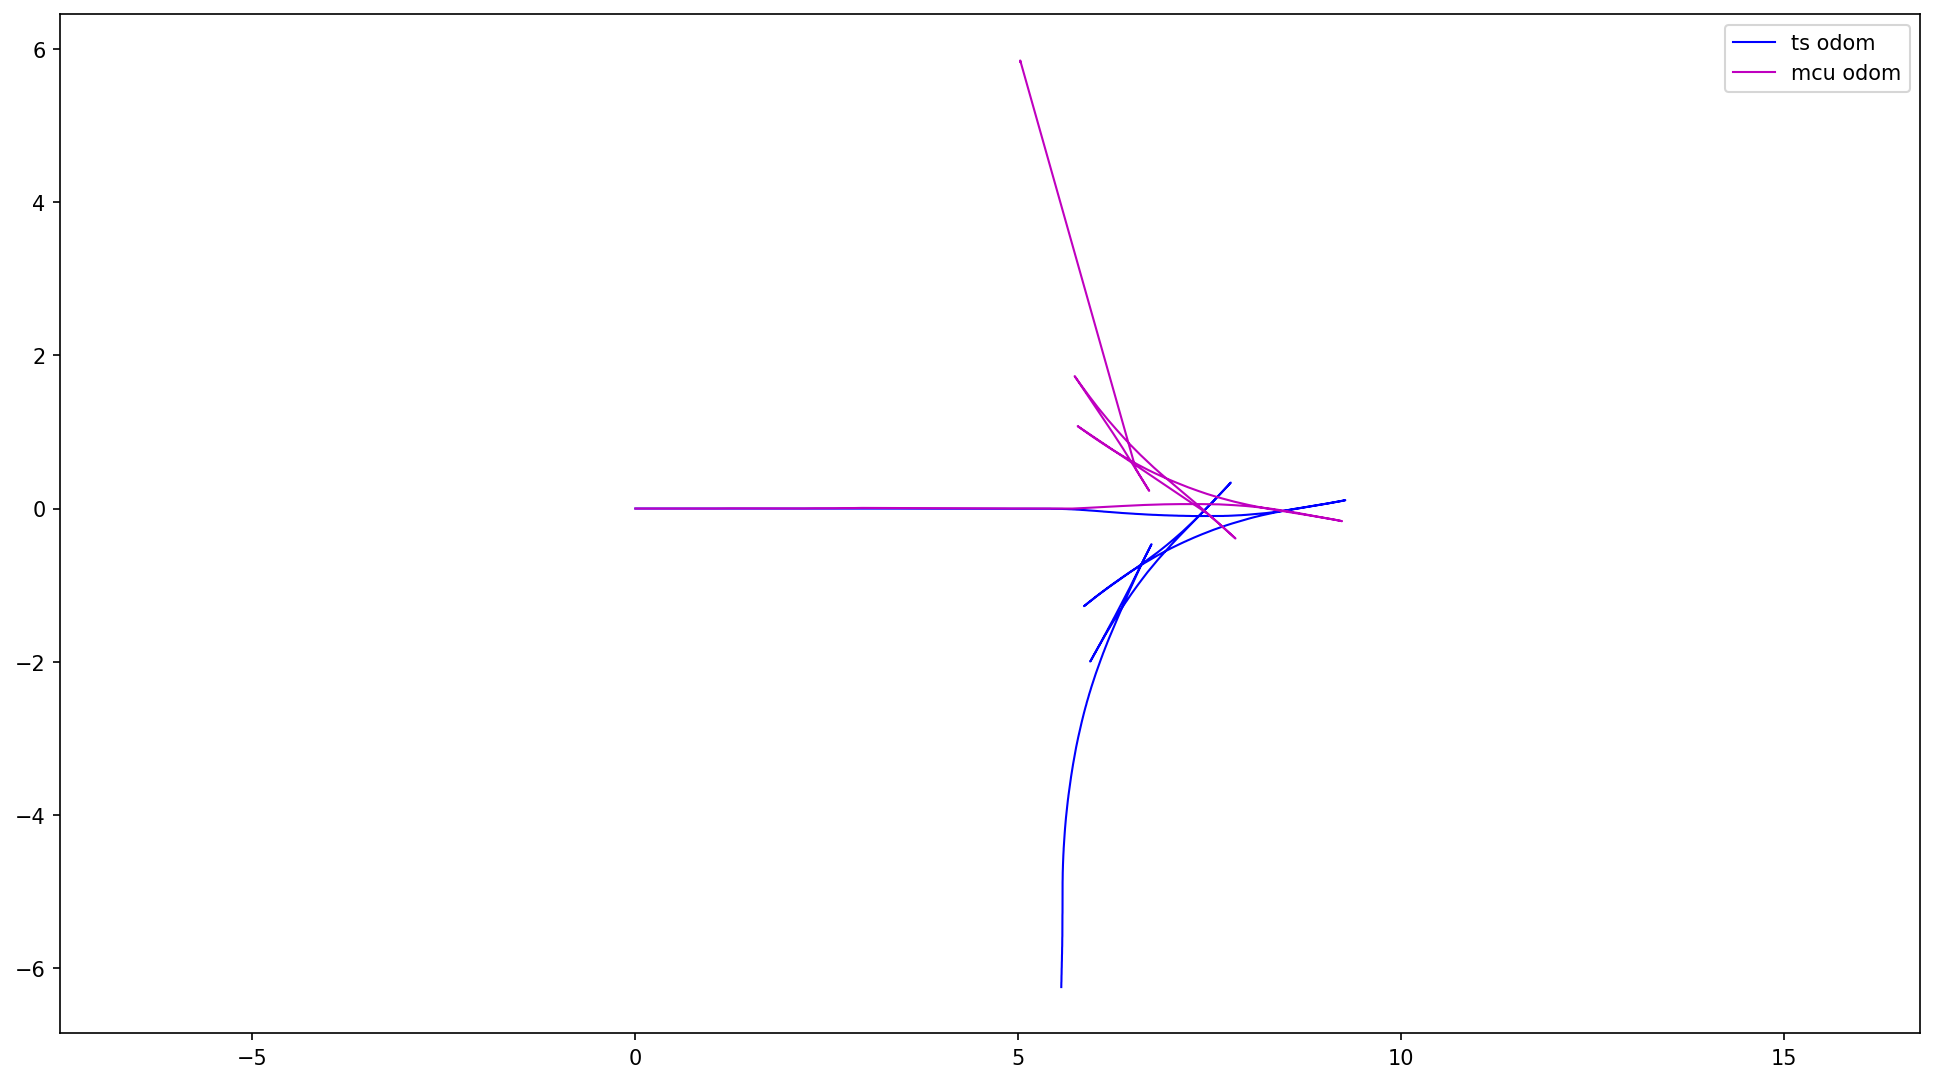

In [129]:
## 3. plot path

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")


# plt.plot(path_carx, path_cary, label="compute_path", linewidth=4, alpha=0.4, color="g")
plt.plot(odom_x_car, odom_y_car, label="ts odom", linewidth=1, alpha=1, color="b")
plt.plot(mcu_odom_x_car, mcu_odom_y_car, label="mcu odom", linewidth=1, alpha=1, color="m")

# plt.plot(compute_path_2_x, compute_path_2_y, label="compute_path_2_x", linewidth=4, alpha=0.1, color="r")
# plt.plot(path_carx_5, path_cary_5, label="path_cary_5", linewidth=4, alpha=0.2, color="b")
# plt.plot(path_carx_4_1, path_cary_4_1, label="path_cary_4_1", linewidth=4, alpha=0.3, color="b")
# plt.plot(path_carx_3_1, path_cary_3_1, label="path_cary_3_1", linewidth=4, alpha=0.4, color="b")
# plt.plot(path_carx_2, path_cary_2, label="path_cary_2", linewidth=4, alpha=1, color="r")
# plt.plot(path_carx_1, path_cary_1, label="path_cary_1", linewidth=4, alpha=1, color="g")


plt.legend(loc="best")

plt.show()